<div dir="rtl" style="text-align: right;">
    <h1 style="font-family: Vazir, sans-serif;">
        تمرین شماره ۲: درس پردازش زبان طبیعی - دانشگاه تهران، پائیز ۱۴۰۳
    </h1>
</div>



نام:رضا منصوری خواه

شماره دانشجویی:810103246

In [84]:
print("https://chatgpt.com/share/6733a915-9260-8006-a9bc-214f1d61dc40")

https://chatgpt.com/share/6733a915-9260-8006-a9bc-214f1d61dc40


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
سوالات خودتان را می‌توانید از طریق ایمیل
 از طراح تمرین بپرسید.
•	سوال ۱ و ۲ – amirh.bonakdar@ut.ac.ir 
•	سوال ۳ - alikhorramfar@gmail.com

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px; color: red; font-weight: bold;">
قوانین و توضیحاتی آخر فایل تمرین حتما به دقت مطالعه شود.
</div>

# **سوال اول:**

## *مجموعه داده*

### الف

توضیحات خود را اینجا بنویسید

In [22]:



def load_documents(docs_path):
    # Step 1: Load documents from 'cran.all.1400'
    documents = {}
    with open(docs_path, 'r') as file:
        content = file.read()
        docs = re.split(r"\.I ", content)[1:]  # Split by document identifier prefix
        for doc in docs:
            lines = doc.splitlines()
            doc_id = lines[0].strip()
            doc_text = "\n".join(lines[2:])  # Skip .T and first line for title/author, rest is content
            documents[doc_id] = doc_text
    return documents


def load_queries(queries_path):
    queries = {}
    with open(queries_path, 'r') as file:
        content = file.read()
        qry_sections = re.split(r"\.I ", content)[1:]  # Split by query identifier prefix
        for idx, qry in enumerate(qry_sections):
            lines = qry.splitlines()
            query_text = "\n".join(lines[2:])  # Skip the first 2 lines to get query text
            queries[idx + 1] = query_text  # Use a continuous index from 1 to total count
    return queries


def load_relevance_judgments(qrels_path, queries_path):
    queries = load_queries(queries_path)
    relevance_judgments = {i + 1: set() for i in range(len(queries))}

    with open(qrels_path, 'r') as file:
        for line in file:
            query_id, doc_id, relevance = map(int, line.split())
            # new_query_id = query_id_map.get(query_id)
            if query_id and relevance >= 2:  # Only consider relevance >= 2
                relevance_judgments[query_id].add(str(doc_id))
    return relevance_judgments


def preprocess_text(text):
    # Remove non-word characters and extra punctuation
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    tokens = text.split()
    return tokens


def preprocess_documents_and_queries(documents, queries):
    preprocessed_documents = {doc_id: preprocess_text(doc_text) for doc_id, doc_text in documents.items()}
    preprocessed_queries = {query_id: preprocess_text(query_text) for query_id, query_text in queries.items()}
    return preprocessed_documents, preprocessed_queries


def create_vocabulary(documents):
    all_tokens = []
    for doc_tokens in documents.values():
        all_tokens.extend(doc_tokens)
    vocabulary = set(all_tokens)
    return vocabulary


def qrels_defs():
    print("Qrels Definitions:")
    print("0: Not Relevant")
    print("1: Marginally Relevant")
    print("2: Relevant")
    print("3: Highly Relevant")


def metadata(documents, queries, relevance_judgments):
    print("Dataset Metadata:")
    print(f"Total number of documents: {len(documents)}")
    print(f"Total number of queries: {len(queries)}")
    total_rels = sum(len(docs) for docs in relevance_judgments.values())
    print(f"Total number of relevance judgments: {total_rels}")
    print(f"Average judgments per query: {total_rels / len(queries):.2f}")


docs_path = "cran/cran.all.1400"
queries_path = "cran/cran.qry"
qrels_path = "cran/cranqrel"
documents = load_documents(docs_path)
queries = load_queries(queries_path)
relevance_judgments = load_relevance_judgments(qrels_path=qrels_path, queries_path=queries_path)
preprocessed_documents, preprocessed_queries = preprocess_documents_and_queries(documents, queries)
vocabulary = create_vocabulary(preprocessed_documents)
print(f"Total vocabulary size: {len(vocabulary)}")
qrels_defs()
metadata(preprocessed_documents, preprocessed_queries, relevance_judgments)






Total vocabulary size: 9422
Qrels Definitions:
0: Not Relevant
1: Marginally Relevant
2: Relevant
3: Highly Relevant
Dataset Metadata:
Total number of documents: 1400
Total number of queries: 225
Total number of relevance judgments: 1484
Average judgments per query: 6.60


### ب

توضیحات خود را اینجا بنویسید

In [19]:

def create_tf_vectors(documents, vocabulary):
    tf_vectors = {}
    for doc_id, doc_tokens in documents.items():
        word_count = Counter(doc_tokens)
        tf_vector = {word: word_count.get(word, 0) for word in vocabulary}
        tf_vectors[doc_id] = tf_vector

    return tf_vectors


def create_query_tf_vectors(queries, vocabulary):
    query_tf_vectors = {}

    for query_id, query_tokens in queries.items():
        word_count = Counter(query_tokens)
        tf_vector = {word: word_count.get(word, 0) for word in vocabulary}
        query_tf_vectors[query_id] = tf_vector

    return query_tf_vectors


document_tf_vectors = create_tf_vectors(preprocessed_documents, vocabulary)
query_tf_vectors = create_query_tf_vectors(preprocessed_queries, vocabulary)

print("Document TF Vector For Doc ID 1:")
print(document_tf_vectors.get('1', {}))

print("\nQuery TF Vector Query ID 1:")
print(query_tf_vectors.get(1, {}))


Document TF Vector For Doc ID 1:
{'assumes': 0, 'thought': 0, 'berger': 0, 'ripples': 0, 'trella': 0, 'focused': 0, 'arithmetical': 0, 'karchmar': 0, 'preponderance': 0, '672': 0, 'screens': 0, 'repair': 0, 'metal': 0, 'teddington': 0, 'manifested': 0, 'w': 1, 'decelerating': 0, 'copper': 0, 'interaction': 0, 'accompanying': 0, 'cp213': 0, 'closeness': 0, 'f': 0, 'd1074': 0, 'kester': 0, 'type': 0, 'shanks': 0, 'spherical': 0, 'huckell': 0, 'divided': 0, 'manifest': 0, 'employed': 0, 'surveyed': 0, 'npl': 0, 'proportional': 0, 'd984': 0, 'neumann': 0, 'supplement': 0, 'fan': 0, 'drive': 0, 'overpressures': 0, '1825': 0, '56': 0, 'paraboloid': 0, 'attachment': 0, 'computation': 0, 'defence': 0, 'life': 0, 'torda': 0, 'ahead': 0, 'jetlike': 0, 'spheroids': 0, 'enjoy': 0, 'trend': 0, 'd729': 0, 'resembles': 0, 'rockey': 0, 'conjectured': 0, 'inviscid': 0, 'martian': 0, 'cone': 0, 'culebra': 0, 'stalling': 0, 'reynolds': 0, 't6': 0, 'warhead': 0, 'buckling': 0, '32': 0, 'gamma': 0, 'achiev

## *بخش اول*

### الف

توضیحات خود را اینجا بنویسید

In [5]:
import re
from collections import defaultdict


def load_documents(docs_path):
    # Step 1: Load documents from 'cran.all.1400'
    documents = {}
    with open(docs_path, 'r') as file:
        content = file.read()
        docs = re.split(r"\.I ", content)[1:]  # Split by document identifier prefix
        for doc in docs:
            lines = doc.splitlines()
            doc_id = lines[0].strip()
            doc_text = "\n".join(lines[2:])  # Skip .T and first line for title/author, rest is content
            documents[doc_id] = doc_text
    return documents


def load_queries(queries_path):
    queries = {}
    with open(queries_path, 'r') as file:
        content = file.read()
        qry_sections = re.split(r"\.I ", content)[1:]  # Split by query identifier prefix
        for idx, qry in enumerate(qry_sections):
            lines = qry.splitlines()
            query_text = "\n".join(lines[2:])  # Skip the first 2 lines to get query text
            queries[idx + 1] = query_text  # Use a continuous index from 1 to total count
    return queries


def load_relevance_judgments(qrels_path, queries_path):
    queries = load_queries(queries_path)
    relevance_judgments = {i + 1: set() for i in range(len(queries))}

    with open(qrels_path, 'r') as file:
        for line in file:
            query_id, doc_id, relevance = map(int, line.split())
            # new_query_id = query_id_map.get(query_id)
            if query_id and relevance >= 2:  # Only consider relevance >= 2
                relevance_judgments[query_id].add(str(doc_id))
    return relevance_judgments


def preprocess_text(text):
    # Remove non-word characters and extra punctuation
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    tokens = text.split()
    return tokens


def preprocess_documents_and_queries(documents, queries):
    preprocessed_documents = {doc_id: preprocess_text(doc_text) for doc_id, doc_text in documents.items()}
    preprocessed_queries = {query_id: preprocess_text(query_text) for query_id, query_text in queries.items()}
    return preprocessed_documents, preprocessed_queries


def create_vocabulary(documents):
    all_tokens = []
    for doc_tokens in documents.values():
        all_tokens.extend(doc_tokens)
    vocabulary = set(all_tokens)
    return vocabulary


def qrels_defs():
    print("Qrels Definitions:")
    print("0: Not Relevant")
    print("1: Marginally Relevant")
    print("2: Relevant")
    print("3: Highly Relevant")


def metadata(documents, queries, relevance_judgments):
    print("Dataset Metadata:")
    print(f"Total number of documents: {len(documents)}")
    print(f"Total number of queries: {len(queries)}")
    total_rels = sum(len(docs) for docs in relevance_judgments.values())
    print(f"Total number of relevance judgments: {total_rels}")
    print(f"Average judgments per query: {total_rels / len(queries):.2f}")


docs_path = "cran/cran.all.1400"
queries_path = "cran/cran.qry"
qrels_path = "cran/cranqrel"
documents = load_documents(docs_path)
queries = load_queries(queries_path)
relevance_judgments = load_relevance_judgments(qrels_path=qrels_path, queries_path=queries_path)
preprocessed_documents, preprocessed_queries = preprocess_documents_and_queries(documents, queries)
vocabulary = create_vocabulary(preprocessed_documents)
print(f"Total vocabulary size: {len(vocabulary)}")
qrels_defs()
metadata(preprocessed_documents, preprocessed_queries, relevance_judgments)






Total vocabulary size: 9422
Qrels Definitions:
0: Not Relevant
1: Marginally Relevant
2: Relevant
3: Highly Relevant
Dataset Metadata:
Total number of documents: 1400
Total number of queries: 225
Total number of relevance judgments: 1484
Average judgments per query: 6.60


### ب

توضیحات خود را اینجا بنویسید

In [22]:
from collections import Counter


def create_tf_vectors(documents, vocabulary):
    tf_vectors = {}
    for doc_id, doc_tokens in documents.items():
        word_count = Counter(doc_tokens)
        tf_vector = {word: word_count.get(word, 0) for word in vocabulary}
        tf_vectors[doc_id] = tf_vector

    return tf_vectors


def create_query_tf_vectors(queries, vocabulary):
    query_tf_vectors = {}

    for query_id, query_tokens in queries.items():
        word_count = Counter(query_tokens)
        tf_vector = {word: word_count.get(word, 0) for word in vocabulary}
        query_tf_vectors[query_id] = tf_vector

    return query_tf_vectors


document_tf_vectors = create_tf_vectors(preprocessed_documents, vocabulary)
query_tf_vectors = create_query_tf_vectors(preprocessed_queries, vocabulary)

print("Document TF Vector For Doc ID 1:")
print(document_tf_vectors.get('1', {}))

print("\nQuery TF Vector Query ID 1:")
print(query_tf_vectors.get(1, {}))


Document TF Vector For Doc ID 1:
{'aside': 0, 'divide': 0, '433': 0, 'definition': 0, 'accumulation': 0, 'airplanes': 0, 'positively': 0, '4094': 0, 'directly': 0, 'wu': 0, 'app': 0, 'angew': 0, 'oxygen': 0, 'imparted': 0, 'proportioning': 0, 'gasdynamics': 0, 'convergence': 0, 'cylinderical': 0, 'leiss': 0, 'katzen': 0, 'facilitates': 0, 'buzz': 0, 'magnetofluidmechanics': 0, 'undoubtedly': 0, 'cam': 0, '1500': 0, 'careful': 0, 'interanl': 0, 'circulation': 0, 'separates': 0, 'seasonal': 0, 'astronautical': 0, 'whatever': 0, 'oriented': 0, 'hankel': 0, 'y1': 0, 'alan': 0, 'organization': 0, '217': 0, 'conceived': 0, 'front': 0, 'cruising': 0, 'howell': 0, 'centrally': 0, 'changing': 0, 'attendant': 0, 'appears': 0, 'definite': 0, 'robertson': 0, 'mat': 0, 'uniform': 0, 'illustrations': 0, 'subarcs': 0, 'swigart': 0, '706': 0, '324': 1, 'sputnik': 0, 'boyd': 0, '1076': 0, 'table': 0, 'tabulation': 0, '1427': 0, 'interferograms': 0, 'consistently': 0, 'conductor': 0, 'breaks': 0, 'suffe

## *بخش دوم*

توضیحات خود را اینجا بنویسید

In [17]:
import math


def compute_idf(documents, vocabulary):
    N = len(documents)  # Total number of documents
    idf = {}
    for word in vocabulary:
        doc_count_with_word = 0
        for doc_tokens in documents.values():
            if word in doc_tokens:
                doc_count_with_word += 1
        idf[word] = math.log((N + 1) / (doc_count_with_word + 1)) + 1
    return idf


def compute_tf(doc_tokens):
    tf = Counter(doc_tokens)
    total_word = len(doc_tokens)
    for word in tf:
        tf[word] = tf[word] / total_word
    return tf


def create_tfidf_vectors(documents, vocabulary, queries):
    tfidf_vectors = {}
    idf = compute_idf(documents, vocabulary)
    for doc_id, doc_tokens in documents.items():
        tf = compute_tf(doc_tokens)
        tfidf_vector = {word: 0 for word in vocabulary}
        for word in vocabulary:
            tfidf_vector[word] = tf.get(word, 0) * idf.get(word, 0)  # TF-IDF = TF * IDF
        tfidf_vectors[doc_id] = tfidf_vector

    query_tfidf_vectors = {}
    for query_id, query_tokens in queries.items():
        tf = compute_tf(query_tokens)
        tfidf_vector = {word: 0 for word in vocabulary}
        for word in vocabulary:
            tfidf_vector[word] = tf.get(word, 0) * idf.get(word, 0)  # TF-IDF = TF * IDF
        query_tfidf_vectors[query_id] = tfidf_vector
    return tfidf_vectors, query_tfidf_vectors


document_tfidf_vectors, query_tfidf_vectors = create_tfidf_vectors(preprocessed_documents, vocabulary, queries)
my_dict = {i: f"value_{i}" for i in range(10)}

print("document tfidf")
# Get the first 2 document_tfidf
first_10_items = list(document_tfidf_vectors.items())[:2]
print(first_10_items)
print("=" * 150)
# Get the first query_tfidf
first_10_items = list(query_tfidf_vectors.items())[:2]
print(first_10_items)

document tfidf
[('1', {'aside': 0.0, 'divide': 0.0, '433': 0.0, 'definition': 0.0, 'accumulation': 0.0, 'airplanes': 0.0, 'positively': 0.0, '4094': 0.0, 'directly': 0.0, 'wu': 0.0, 'app': 0.0, 'angew': 0.0, 'oxygen': 0.0, 'imparted': 0.0, 'proportioning': 0.0, 'gasdynamics': 0.0, 'convergence': 0.0, 'cylinderical': 0.0, 'leiss': 0.0, 'katzen': 0.0, 'facilitates': 0.0, 'buzz': 0.0, 'magnetofluidmechanics': 0.0, 'undoubtedly': 0.0, 'cam': 0.0, '1500': 0.0, 'careful': 0.0, 'interanl': 0.0, 'circulation': 0.0, 'separates': 0.0, 'seasonal': 0.0, 'astronautical': 0.0, 'whatever': 0.0, 'oriented': 0.0, 'hankel': 0.0, 'y1': 0.0, 'alan': 0.0, 'organization': 0.0, '217': 0.0, 'conceived': 0.0, 'front': 0.0, 'cruising': 0.0, 'howell': 0.0, 'centrally': 0.0, 'changing': 0.0, 'attendant': 0.0, 'appears': 0.0, 'definite': 0.0, 'robertson': 0.0, 'mat': 0.0, 'uniform': 0.0, 'illustrations': 0.0, 'subarcs': 0.0, 'swigart': 0.0, '706': 0.0, '324': 0.044387138246390664, 'sputnik': 0.0, 'boyd': 0.0, '107

## *بخش سوم*

### الف

توضیحات خود را اینجا بنویسید

In [32]:
def compute_each_two_word_probability(documents, vocabulary):
    window_size = 2
    probability_matrix = defaultdict(lambda: defaultdict(int))
    total_tokens = 0
    for doc_tokens in documents.values():
        total_tokens += len(doc_tokens) - 1
        for i, word1 in enumerate(doc_tokens):
            if word1 not in vocabulary:
                continue
            for j in range(i + 1, min(i + window_size, len(doc_tokens))):
                word2 = doc_tokens[j]
                if word2 in vocabulary:
                    probability_matrix[word1][word2] += 1
    for word1 in probability_matrix:
        for word2 in probability_matrix[word1]:
            probability_matrix[word1][word2] /= total_tokens
    return probability_matrix


def compute_ppmi(preprocessed_documents, vocabulary):
    probability_matrix = compute_each_two_word_probability(preprocessed_documents, vocabulary)
    ppmi_matrix = defaultdict(lambda: defaultdict(float))
    for word1 in vocabulary:
        for word2 in vocabulary:
            if word1 == word2:
                continue
            p_w1_w2 = probability_matrix[word1].get(word2, 0)  # P(w1, w2)
            p_w1 = sum(probability_matrix[word1].values())  # P(w1)
            p_w2 = sum(probability_matrix[word2].values())  # P(w2)
            if p_w1 > 0 and p_w2 > 0 and p_w1_w2 > 0:
                ppmi_score = math.log(p_w1_w2 / (p_w1 * p_w2)) if p_w1_w2 > 0 else 0
                ppmi_matrix[word1][word2] = max(ppmi_score, 0)  # PPMI = max(log(P(w1, w2) / (P(w1) * P(w2))), 0)
    return ppmi_matrix


documents_ppmi_vectors = compute_ppmi(preprocessed_documents, vocabulary)
queries_ppmi_vectors = compute_ppmi(preprocessed_queries, vocabulary)

print("Document PPMI Matrix (sample):")
for word1 in list(vocabulary)[:10]:
    for word2 in list(vocabulary)[:10]:
        print(f"PPMI({word1}, {word2}): {documents_ppmi_vectors[word1].get(word2, 0)}")

print("Queries PPMI Matrix (sample):")
for word1 in list(vocabulary)[:10]:
    for word2 in list(vocabulary)[:10]:
        print(f"PPMI({word1}, {word2}): {queries_ppmi_vectors[word1].get(word2, 0)}")

Document PPMI Matrix (sample):
PPMI(aside, aside): 0
PPMI(aside, divide): 0
PPMI(aside, 433): 0
PPMI(aside, definition): 0
PPMI(aside, accumulation): 0
PPMI(aside, airplanes): 0
PPMI(aside, positively): 0
PPMI(aside, 4094): 0
PPMI(aside, directly): 0
PPMI(aside, wu): 0
PPMI(divide, aside): 0
PPMI(divide, divide): 0
PPMI(divide, 433): 0
PPMI(divide, definition): 0
PPMI(divide, accumulation): 0
PPMI(divide, airplanes): 0
PPMI(divide, positively): 0
PPMI(divide, 4094): 0
PPMI(divide, directly): 0
PPMI(divide, wu): 0
PPMI(433, aside): 0
PPMI(433, divide): 0
PPMI(433, 433): 0
PPMI(433, definition): 0
PPMI(433, accumulation): 0
PPMI(433, airplanes): 0
PPMI(433, positively): 0
PPMI(433, 4094): 0
PPMI(433, directly): 0
PPMI(433, wu): 0
PPMI(definition, aside): 0
PPMI(definition, divide): 0
PPMI(definition, 433): 0
PPMI(definition, definition): 0
PPMI(definition, accumulation): 0
PPMI(definition, airplanes): 0
PPMI(definition, positively): 0
PPMI(definition, 4094): 0
PPMI(definition, directly):

### ب

توضیحات خود را اینجا بنویسید

In [19]:
def compute_document_embedding(tokens, ppmi_vectors, vocabulary):
    word_vectors = []
    for word in tokens:
        if word in ppmi_vectors:
            word_vectors.append(np.array([ppmi_vectors[word].get(w, 0) for w in vocabulary]))
    if len(word_vectors) > 0:
        document_vector = np.mean(word_vectors,
                                  axis=0)  # axis=0 means get mean of each column because each column is feature.
        return document_vector
    else:
        return np.zeros(len(vocabulary))


def compute_all_embeddings(documents, ppmi_vectors, vocabulary):
    embeddings = {}
    for item_id, text in documents.items():
        all_token_list = preprocess_text(text)
        valid_tokens = [word for word in all_token_list if word in vocabulary]
        embeddings[item_id] = compute_document_embedding(valid_tokens, ppmi_vectors, vocabulary)
    return embeddings


document_embeddings = compute_all_embeddings(documents, documents_ppmi_vectors, vocabulary)
query_embeddings = compute_all_embeddings(queries, queries_ppmi_vectors, vocabulary)
print("Document Embeddings:")
for doc_id, embedding in document_embeddings.items():
    print(f"Document {doc_id}: {embedding}")

print("\nQuery Embeddings:")
for query_id, embedding in query_embeddings.items():
    print(f"Query {query_id}: {embedding}")


Document Embeddings:
Document 1: [0.03172868 0.         0.         ... 0.20506906 0.         0.        ]
Document 2: [0.04520634 0.         0.         ... 0.26113793 0.         0.        ]
Document 3: [0.         0.         0.         ... 0.30936497 0.         0.        ]
Document 4: [0.         0.         0.         ... 0.29399792 0.         0.        ]
Document 5: [0.         0.         0.         ... 0.28240344 0.         0.        ]
Document 6: [0.04086653 0.         0.         ... 0.25519656 0.         0.        ]
Document 7: [0.03959935 0.         0.         ... 0.19990599 0.02406033 0.        ]
Document 8: [0.02646796 0.         0.         ... 0.15332271 0.         0.        ]
Document 9: [0.0279143  0.         0.         ... 0.18835671 0.03392113 0.        ]
Document 10: [0.06549124 0.         0.         ... 0.15091867 0.         0.        ]
Document 11: [0.         0.         0.         ... 0.24515126 0.         0.        ]
Document 12: [0.         0.         0.         ... 0.

## *بخش چهارم*

### الف

توضیحات خود را اینجا بنویسید

In [29]:
# FOR TF
from numpy.linalg import norm


def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1[word] * vec2[word] for word in vec1)
    norm_vec1 = norm(list(vec1.values()))  #  "length" of a vector in power 2
    norm_vec2 = norm(list(vec2.values()))
    if norm_vec1 > 0 and norm_vec2 > 0:
        return dot_product / (norm_vec1 * norm_vec2)
    else:
        return 0


def precision_at_5(relevance_judgments, retrieved_docs):
    retrieved_relevant = 0
    if len(relevance_judgments) > 0:
        for i in range(min(5, len(retrieved_docs))):
            if retrieved_docs[i] in relevance_judgments:
                retrieved_relevant += 1
    return retrieved_relevant / 5


precision_scores = []
for query_id, query_vector in query_tf_vectors.items():
    similarities = [(doc_id, cosine_similarity(query_vector, doc_vector)) for doc_id, doc_vector in
                    document_tf_vectors.items()]
    sorted_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    retrieved_docs = [doc_id for doc_id, _ in sorted_docs[:5]]
    precision = precision_at_5(relevance_judgments.get(query_id, []), retrieved_docs)
    precision_scores.append(precision)

mean_precision_tf = sum(precision_scores) / len(precision_scores)

print(f"Mean Precision@5 for TF: {mean_precision_tf}")


Mean Precision@5 for TF: 0.14933333333333335


### ب

توضیحات خود را اینجا بنویسید

In [30]:
# FOR TF-IDF
precision_scores = []
for query_id, query_vector in query_tfidf_vectors.items():
    similarities = [(doc_id, cosine_similarity(query_vector, doc_vector)) for doc_id, doc_vector in
                    document_tfidf_vectors.items()]
    sorted_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    retrieved_docs = [doc_id for doc_id, _ in sorted_docs[:5]]
    precision = precision_at_5(relevance_judgments.get(query_id, []), retrieved_docs)
    precision_scores.append(precision)

mean_precision_tfidf = sum(precision_scores) / len(precision_scores)

print(f"Mean Precision@5 for TF: {mean_precision_tfidf}")


Mean Precision@5 for TF: 0.0035555555555555557


### ج


In [33]:
# FOR PPMI
precision_scores = []
for query_id, query_vector in queries_ppmi_vectors.items():
    similarities = [(doc_id, cosine_similarity(query_vector, doc_vector)) for doc_id, doc_vector in
                    documents_ppmi_vectors.items()]
    sorted_docs = sorted(similarities, key=lambda x: x[1], reverse=True)
    retrieved_docs = [doc_id for doc_id, _ in sorted_docs[:5]]
    print(relevance_judgments.get(query_id, []))
    precision = precision_at_5(relevance_judgments.get(query_id, []), retrieved_docs)
    precision_scores.append(precision)

mean_precision_ppmi = sum(precision_scores) / len(precision_scores)

print(f"Mean Precision@5 for TF: {mean_precision_ppmi}")

Mean Precision@5 for TF: 0.0


## *بخش پنجم*

### الف

توضیحات خود را اینجا بنویسید

[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### ب

توضیحات خود را اینجا بنویسید

### ج

توضیحات خود را اینجا بنویسید

### د

توضیحات خود را اینجا بنویسید

Epoch 1/10, Loss: nan
Epoch 2/10, Loss: 371213.093134619
Epoch 3/10, Loss: 350920.6427430298
Epoch 4/10, Loss: 336504.16483271605
Epoch 5/10, Loss: 323943.27125654224
Epoch 6/10, Loss: 312922.1565578909
Epoch 7/10, Loss: 303473.4396232921
Epoch 8/10, Loss: 295388.77341679827
Epoch 9/10, Loss: 288402.11064398795
Epoch 10/10, Loss: 282293.0964000628


# **سوال دوم:**

## *مجموعه داده*

توضیحات خود را اینجا بنویسید

In [ ]:
#write your code here



## *بخش اول*

### الف

توضیحات خود را اینجا بنویسید

In [4]:
import re
import random
from nltk.corpus import stopwords
from datasets import load_dataset
import nltk

nltk.download('stopwords')
imdb_dataset = load_dataset("imdb")
train_data = imdb_dataset['train'][:2500]
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words


processed_comments = [preprocess_text(text) for text in train_data['text']]

[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### ب

توضیحات خود را اینجا بنویسید

In [5]:

def generate_positive_and_negative_samples(sentences, window_size, num_negative_samples, all_words):
    positive = []
    negative = []
    all_words_set = set(all_words)
    for sentence in sentences:
        sentence_len = len(sentence)
        context_map = {}
        for i, target_word in enumerate(sentence):
            start = max(0, i - window_size)
            end = min(sentence_len, i + window_size + 1)
            context_words = {sentence[j] for j in range(start, end) if j != i}
            context_map[target_word] = context_words
        for target_word, context_words in context_map.items():
            positive.extend([(target_word, context, 1) for context in context_words])
            potential_negatives = list(all_words_set - context_words - {target_word})
            random.shuffle(potential_negatives)
            negative.extend(
                [(target_word, negative_word, 0) for negative_word in potential_negatives[:num_negative_samples]])
    return positive, negative


all_words = set(word for sentence in processed_comments for word in sentence)
window_size = 2
num_negative_samples = 4
positive, negative_samples = generate_positive_and_negative_samples(processed_comments, window_size,
                                                                    num_negative_samples, all_words)
all_samples = positive + negative_samples


### ج

توضیحات خود را اینجا بنویسید

In [6]:
import numpy as np
import torch

embedding_dim = 5
learning_rate = 0.01
epochs = 10
all_words = set(word for sentence in processed_comments for word in sentence)
word_index_dict = {word: idx for idx, word in enumerate(all_words)}
index_word_dict = {idx: word for word, idx in word_index_dict.items()}


def skipgram_model(target_word_index, context_word_index, embeddings, learning_rate, label):
    target_vector = torch.tensor(embeddings[target_word_index], dtype=torch.float32)
    context_vector = torch.tensor(embeddings[context_word_index], dtype=torch.float32)
    score = torch.sum(target_vector * context_vector)
    Z = torch.sigmoid(score)
    error = label - Z
    loss = -label * torch.log(Z) - (1 - label) * torch.log(1 - Z)
    grad_target = -error * context_vector
    grad_context = -error * target_vector
    embeddings[target_word_index] -= learning_rate * grad_target.detach().numpy()
    embeddings[context_word_index] -= learning_rate * grad_context.detach().numpy()
    return loss.item()



### د

توضیحات خود را اینجا بنویسید

In [7]:
import numpy as np

embedding_matrix = np.random.randn(len(word_index_dict), embedding_dim)

for epoch in range(epochs):
    total_loss = 0
    for target_word, context_word, label in all_samples:
        target_word_index = word_index_dict[target_word]
        context_word_index = word_index_dict[context_word]
        loss = skipgram_model(target_word_index, context_word_index, embedding_matrix, learning_rate, label)
        total_loss += loss

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss}')


Epoch 1/10, Loss: nan
Epoch 2/10, Loss: nan
Epoch 3/10, Loss: nan
Epoch 4/10, Loss: 1222898.1881417304
Epoch 5/10, Loss: 1172238.2921919203
Epoch 6/10, Loss: 1131585.9373523141
Epoch 7/10, Loss: 1097816.7316039447
Epoch 8/10, Loss: 1069548.3374834699
Epoch 9/10, Loss: 1046059.6947045373
Epoch 10/10, Loss: 1026805.527537441


## *بخش دوم*

### الف

توضیحات خود را اینجا بنویسید

In [8]:
import re
import random
from nltk.corpus import stopwords

all_train_data = imdb_dataset['train']
all_test_data = imdb_dataset['test']
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words


processed_comments_all = [preprocess_text(text) for text in all_train_data['text']]
all_all_words = set(word for sentence in processed_comments_all for word in sentence)

### ب

توضیحات خود را اینجا بنویسید

In [15]:
import numpy as np


def generate_sentence_embeddings(sentences, word_index_dict, embedding_matrix):
    sentence_embeddings = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            if word in word_index_dict:
                word_index = word_index_dict[word]
                sentence_vector.append(embedding_matrix[word_index])
        if sentence_vector:
            sentence_embedding = np.mean(sentence_vector, axis=0)
        else:
            sentence_embedding = np.zeros(embedding_matrix.shape[1])
        sentence_embeddings.append(sentence_embedding)
    return np.array(sentence_embeddings)


sentence_embeddings_train = generate_sentence_embeddings(all_train_data['text'], word_index_dict, embedding_matrix)
sentence_embeddings_test = generate_sentence_embeddings(all_test_data['text'], word_index_dict, embedding_matrix)

print("sentence embedding for the first train sentence:", sentence_embeddings_train[0])
print("sentence embedding for the first test sentence:", sentence_embeddings_test[0])


Sentence embedding for the first train sentence: [-0.31208224 -0.09124525  0.24874749 -0.24379141 -0.1843289 ]
Sentence embedding for the first test sentence: [-0.27309801 -0.11273271  0.2796164  -0.3019055  -0.13999153]


### ج

توضیحات خود را اینجا بنویسید

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

train_labels = all_train_data['label']
test_labels = all_test_data['label']

X_train = sentence_embeddings_train
y_train = train_labels
X_test = sentence_embeddings_test
y_test = test_labels

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Naive Bayes Gaussian
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Logistic Regression
log_reg_prediction = log_reg_model.predict(X_test)
naive_bayes_prediction = naive_bayes_model.predict(X_test)

# use confusion_matrix for compute precision,accuracy,recall and f1-score
print("ogistic regression:")
print(classification_report(y_test, log_reg_prediction))
print("confusion matrix for logistic regression:")
print(confusion_matrix(y_test, log_reg_prediction))

# Naive Bayes Gaussian
print("naive bayes evaluation:")
print(classification_report(y_test, naive_bayes_prediction))
print("confusion for naive bayes:")
print(confusion_matrix(y_test, naive_bayes_prediction))



ogistic regression:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55     12500
           1       0.55      0.55      0.55     12500

    accuracy                           0.55     25000
   macro avg       0.55      0.55      0.55     25000
weighted avg       0.55      0.55      0.55     25000

confusion matrix for logistic regression:
[[6819 5681]
 [5595 6905]]
naive bayes evaluation:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58     12500
           1       0.55      0.45      0.50     12500

    accuracy                           0.54     25000
   macro avg       0.54      0.54      0.54     25000
weighted avg       0.54      0.54      0.54     25000

confusion for naive bayes:
[[7933 4567]
 [6875 5625]]


## *بخش سوم*


###  الف

In [61]:
import numpy as np


def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings


glove_file_path = 'data/glove.6B/glove.6B.100d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

###  ب

In [62]:
def generate_sentence_embeddings_glove(sentences, glove_embeddings, embedding_dim=100):
    sentence_embeddings = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            if word in glove_embeddings:
                sentence_vector.append(glove_embeddings[word])
        if sentence_vector:
            sentence_embedding = np.mean(sentence_vector, axis=0)
            sentence_embeddings.append(sentence_embedding)
        else:
            sentence_embeddings.append(np.zeros(embedding_dim))
    return np.array(sentence_embeddings)


train_sentence_embeddings_glove = generate_sentence_embeddings_glove(all_train_data['text'], glove_embeddings)
test_sentence_embeddings_glove = generate_sentence_embeddings_glove(all_test_data['text'], glove_embeddings)

###  ج

In [70]:
X_train = train_sentence_embeddings_glove
y_train = train_labels
X_test = test_sentence_embeddings_glove
y_test = test_labels

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

log_reg_prediction = log_reg_model.predict(X_test)
naive_bayes_prediction = naive_bayes_model.predict(X_test)

print("logistic regression:")
print(classification_report(y_test, log_reg_prediction))
print("confusion for LR:")
print(confusion_matrix(y_test, log_reg_prediction))
print("naive Bayes:")
print(classification_report(y_test, naive_bayes_prediction))
print("confusion for NB:")
print(confusion_matrix(y_test, naive_bayes_prediction))

logistic regression:
              precision    recall  f1-score   support

           0       0.62      0.63      0.63     12500
           1       0.63      0.61      0.62     12500

    accuracy                           0.62     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.62      0.62      0.62     25000

confusion for LR:
[[7923 4577]
 [4850 7650]]
naive Bayes:
              precision    recall  f1-score   support

           0       0.54      0.71      0.62     12500
           1       0.58      0.41      0.48     12500

    accuracy                           0.56     25000
   macro avg       0.56      0.56      0.55     25000
weighted avg       0.56      0.56      0.55     25000

confusion for NB:
[[8850 3650]
 [7408 5092]]


###  د


In [67]:
print("""
 در مجموعه داده GloVe مدل Logistic Regression بهتر از Naive Bayes عمل کرده است با دقت و f1-score بالاتر. Naive Bayes در Recall کلاس 0 عملکرد بهتری دارد اما Recall کلاس 1 به شدت پایین است که نشان‌دهنده عدم تعادل در شناسایی کلاس‌ها است. برای مجموعه داده Skip-Gram هر دو مدل تقریباً عملکرد مشابهی دارند اما Logistic Regression کمی بهتر عمل کرده و دقت بالاتری نشان می‌دهد. به طور کلی GloVe در هر دو مدل Logistic Regression و Naive Bayes عملکرد بهتری نسبت به Skip-Gram داشته و در شناسایی دقیق‌تر کلاس‌ها و تعادل در پیش‌بینی‌ها موفق‌تر بوده است                                                                                
""")


 در مجموعه داده GloVe مدل Logistic Regression بهتر از Naive Bayes عمل کرده است با دقت و f1-score بالاتر. Naive Bayes در Recall کلاس 0 عملکرد بهتری دارد اما Recall کلاس 1 به شدت پایین است که نشان‌دهنده عدم تعادل در شناسایی کلاس‌ها است. برای مجموعه داده Skip-Gram هر دو مدل تقریباً عملکرد مشابهی دارند اما Logistic Regression کمی بهتر عمل کرده و دقت بالاتری نشان می‌دهد. به طور کلی GloVe در هر دو مدل Logistic Regression و Naive Bayes عملکرد بهتری نسبت به Skip-Gram داشته و در شناسایی دقیق‌تر کلاس‌ها و تعادل در پیش‌بینی‌ها موفق‌تر بوده است                                                                                



# **سوال سوم:**

In [21]:
import torch
from transformers import CLIPProcessor, CLIPModel
import numpy as np
from PIL import Image

## Load CLIP model

In [22]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## Function to get text embeddings


In [24]:
def get_text_embedding(text):
    modified_text = "a photo of a " + text
    inputs = processor(text=[modified_text], return_tensors="pt", padding=True)

    with torch.no_grad():
        text_features = model.get_text_features(**inputs)

    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    text_embedding = text_features.cpu().numpy().flatten()

    return text_embedding

## Function to get image embeddings

In [25]:
def get_image_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        image_features = model.get_image_features(**inputs)

    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    image_embedding = image_features.cpu().numpy().flatten()

    return image_embedding

## *بخش اول*

###  الف - ج

توضیحات خود را اینجا بنویسید

In [73]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

word_embeddings = {}
words = ["woman", "man", "queen", "king"]
for word in words:
    word_embeddings[word] = get_text_embedding(word)


def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]


similarities = {
    'king-queen': cosine_sim(word_embeddings['king'], word_embeddings['queen']),
    'king-man': cosine_sim(word_embeddings['king'], word_embeddings['man']),
    'king-woman': cosine_sim(word_embeddings['king'], word_embeddings['woman']),
    'queen-man': cosine_sim(word_embeddings['queen'], word_embeddings['man']),
    'queen-woman': cosine_sim(word_embeddings['queen'], word_embeddings['woman']),
    'man-woman': cosine_sim(word_embeddings['man'], word_embeddings['woman'])
}
print("Text word embeddings result.")
similarities_df = pd.DataFrame(similarities.items(), columns=['Pair', 'Similarity'])
print(similarities_df)
print("=" * 150)
print("ب")
sample_vector = word_embeddings['king'] - word_embeddings['man'] + word_embeddings['woman']
similarities_with_result = {word: cosine_sim(sample_vector, vec) for word, vec in word_embeddings.items()}

# Sort by similarity
sorted_similarities_with_result = sorted(similarities_with_result.items(), key=lambda item: item[1], reverse=True)
print(sorted_similarities_with_result)
print("most similar word to 'king - man + woman':", sorted_similarities_with_result[0][0])

print("=" * 150)
print("ج")
print("""
 شباهت کسینوسی بین کلمات king و queen (0.941025) نشان می‌دهد که این دو کلمه در فضای برداری مدل به هم نزدیک هستند، که نشان‌دهنده شباهت معنایی آنها در نقش    پادشاه و ملکه است.همچنین، شباهت بالای بین man و woman (0.941472) نشان می‌دهد که مدل تفاوت‌های جنسیتی را به خوبی درک کرده است                .
 king - man + woman:
 
 مدل CLIP شباهت معنایی بین king و queen را به خوبی درک کرده است، زیرا هر دو به مفاهیم سلطنتی اشاره دارند و تنها تفاوت آن‌ها جنسیت است. عملیات king - man + woman باعث حذف ویژگی جنسیتی مردانه از king و افزودن ویژگی زنانه می‌شود که نتیجه آن queen است. شباهت کسینوسی بالا بین بردار حاصل و queen نشان‌دهنده دقت مدل در شبیه‌سازی روابط معنایی و جنسیتی است                                                                                                                                   .
""")



Text word embeddings result.
          Pair  Similarity
0   king-queen    0.941025
1     king-man    0.922229
2   king-woman    0.867337
3    queen-man    0.892530
4  queen-woman    0.927173
5    man-woman    0.941472
ب
[('queen', 0.97214), ('king', 0.9416904), ('woman', 0.9225165), ('man', 0.8605774)]
most similar word to 'king - man + woman': queen
ج

 شباهت کسینوسی بین کلمات king و queen (0.941025) نشان می‌دهد که این دو کلمه در فضای برداری مدل به هم نزدیک هستند، که نشان‌دهنده شباهت معنایی آنها در نقش    پادشاه و ملکه است.همچنین، شباهت بالای بین man و woman (0.941472) نشان می‌دهد که مدل تفاوت‌های جنسیتی را به خوبی درک کرده است                .
 king - man + woman:
 
 مدل CLIP شباهت معنایی بین king و queen را به خوبی درک کرده است، زیرا هر دو به مفاهیم سلطنتی اشاره دارند و تنها تفاوت آن‌ها جنسیت است. عملیات king - man + woman باعث حذف ویژگی جنسیتی مردانه از king و افزودن ویژگی زنانه می‌شود که نتیجه آن queen است. شباهت کسینوسی بالا بین بردار حاصل و queen نشان‌دهنده دقت مدل در شبیه‌سازی 

### د

توضیحات خود را اینجا بنویسید

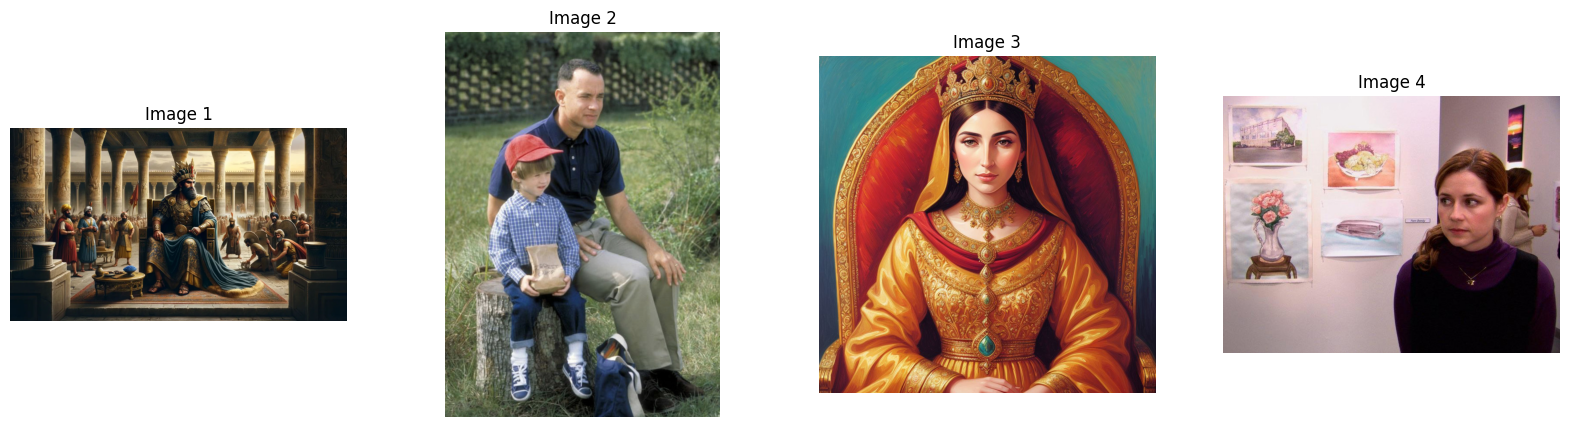

word to most similar to image: {'woman': 'Images/Image4', 'man': 'Images/Image2', 'queen': 'Images/Image3', 'king': 'Images/Image1'}
most similar image to 'king - man + woman': Images/Image3


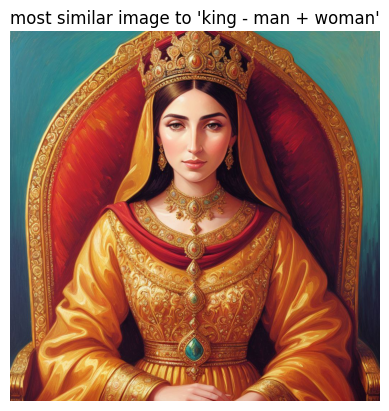


دراینجا به کمک توابع داده شده بردار همه تصاویر را بدست اوردیم و با استفاده از شباهت کسینوسی هرکدام که به یک نزدیک تر بود یعنی شباهت بیشتری داشت پس هرتصویر را به کلمه خودش مپ کردیم                                                                                                                             
اما برای هر کلمه (woman man king queen) و تصاویر مربوطه مانند قسمت قبل بردارهای Embedding استخراج شدند. سپس با انجام عملیات برداری king - man + woman برداری مشابه queen به‌دست آمد. شباهت‌های کسینوسی بین بردارهای کلمات و تصاویر محاسبه شد و تصویری که بیشترین شباهت را با بردار queen داشت تصویر ملکه بود. مدل توانست تصاویر مرتبط با هر کلمه را به‌درستی شبیه‌سازی کرده و کلمات woman man king و queen را به تصاویر خود متصل کند. در نهایت نتیجه نشان داد که تصویر queen به‌طور دقیق با بردار حاصل از عملیات برداری تطابق دارد                                                                                          



In [69]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_paths = ["Images/Image1.jpg", "Images/Image2.jpg", "Images/Image3.jpg", "Images/Image4.jpg"]
image_embeddings = {f"Images/Image{i + 1}": get_image_embedding(image_path) for i, image_path in enumerate(image_paths)}
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, image_path in enumerate(image_paths):
    image = Image.open(image_path)
    axs[i].imshow(image)
    axs[i].set_title(f"Image {i + 1}")
    axs[i].axis('off')
plt.show()


def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]


word_to_image_similarities = {}
for word, word_vec in word_embeddings.items():
    similarities = {image: cosine_sim(word_vec, img_vec) for image, img_vec in image_embeddings.items()}
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    word_to_image_similarities[word] = sorted_similarities[0][0]

print("word to most similar to image:", word_to_image_similarities)

similarities_with_result = {image: cosine_sim(sample_vector, img_vec) for image, img_vec in image_embeddings.items()}

most_similar_image = max(similarities_with_result, key=similarities_with_result.get)
print("most similar image to 'king - man + woman':", most_similar_image)

result_image = Image.open(f"{most_similar_image}.jpg")
plt.imshow(result_image)
plt.title(f"most similar image to 'king - man + woman'")
plt.axis('off')
plt.show()

print("""
دراینجا به کمک توابع داده شده بردار همه تصاویر را بدست اوردیم و با استفاده از شباهت کسینوسی هرکدام که به یک نزدیک تر بود یعنی شباهت بیشتری داشت پس هرتصویر را به کلمه خودش مپ کردیم                                                                                                                             
اما برای هر کلمه (woman man king queen) و تصاویر مربوطه مانند قسمت قبل بردارهای Embedding استخراج شدند. سپس با انجام عملیات برداری king - man + woman برداری مشابه queen به‌دست آمد. شباهت‌های کسینوسی بین بردارهای کلمات و تصاویر محاسبه شد و تصویری که بیشترین شباهت را با بردار queen داشت تصویر ملکه بود. مدل توانست تصاویر مرتبط با هر کلمه را به‌درستی شبیه‌سازی کرده و کلمات woman man king و queen را به تصاویر خود متصل کند. در نهایت نتیجه نشان داد که تصویر queen به‌طور دقیق با بردار حاصل از عملیات برداری تطابق دارد                                                                                          
""")

## *بخش دوم*

###  الف

توضیحات خود را اینجا بنویسید

In [49]:

additional_words = ["brother", "sister", "uncle", "aunt"]
additional_word_embeddings = {word: get_text_embedding(word) for word in additional_words}
all_word_embeddings = {**word_embeddings, **additional_word_embeddings}
from sklearn.decomposition import PCA

all_vectors = np.array([vec for vec in all_word_embeddings.values()])
pca = PCA(n_components=2)  # reduce to 2 dimension
pca_result = pca.fit_transform(all_vectors)
word_pca_embeddings = {word: pca_result[i] for i, word in enumerate(all_word_embeddings.keys())}


### ب

توضیحات خود را اینجا بنویسید

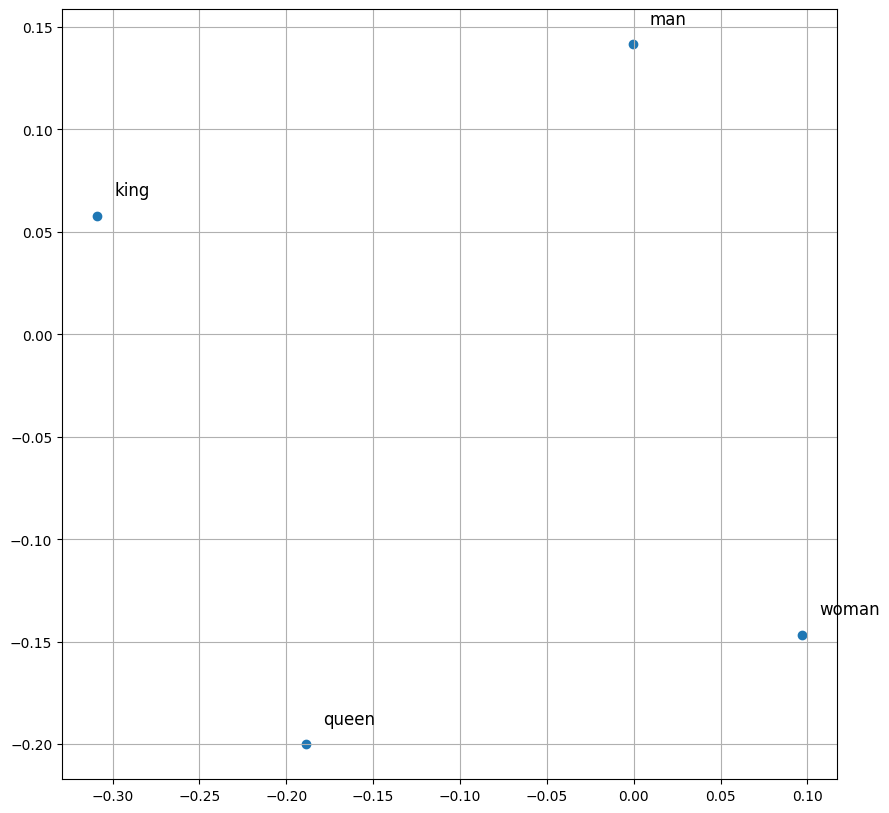


در تصویر به‌دست‌آمده، ابعاد بردارهای کلمات king، queen، man و woman به دو بعد کاهش داده شده تا روابط معنایی آنها قابل مشاهده باشد. کلمات man و woman نزدیک به هم قرار دارند که نشان‌دهنده ارتباط جنسیتی میان آنهاست. همچنین، king و queen به هم نزدیک‌ترند که بیانگر ارتباط معنایی در نقش‌های سلطنتی است. king و man در یک سمت و queen و woman در سمت دیگر قرار دارند که تفاوت معنایی بین جنسیت و نقش‌های اجتماعی را نشان می‌دهد. مدل CLIP با استفاده از تکنیک PCA توانسته است این شباهت‌ها و تفاوت‌ها را دقیقاً شبیه‌سازی و نمایش دهد. این تحلیل نشان می‌دهد که مدل در درک و نمایش روابط پیچیده زبانی بسیار موفق است.                                                                                                         



In [82]:
word_pca_embeddings = {word: pca_result[i] for i, word in enumerate(word_embeddings.keys())}
x_points = [points[0] for points in word_pca_embeddings.values()]
y_points = [points[1] for points in word_pca_embeddings.values()]
words = list(word_pca_embeddings.keys())
plt.figure(figsize=(10, 10))
plt.scatter(x_points, y_points)

for i, word in enumerate(words):
    plt.text(x_points[i] + 0.01, y_points[i] + 0.01, word, fontsize=12)
plt.grid(True)
plt.show()

print("""
در تصویر به‌دست‌آمده، ابعاد بردارهای کلمات king، queen، man و woman به دو بعد کاهش داده شده تا روابط معنایی آنها قابل مشاهده باشد. کلمات man و woman نزدیک به هم قرار دارند که نشان‌دهنده ارتباط جنسیتی میان آنهاست. همچنین، king و queen به هم نزدیک‌ترند که بیانگر ارتباط معنایی در نقش‌های سلطنتی است. king و man در یک سمت و queen و woman در سمت دیگر قرار دارند که تفاوت معنایی بین جنسیت و نقش‌های اجتماعی را نشان می‌دهد. مدل CLIP با استفاده از تکنیک PCA توانسته است این شباهت‌ها و تفاوت‌ها را دقیقاً شبیه‌سازی و نمایش دهد. این تحلیل نشان می‌دهد که مدل در درک و نمایش روابط پیچیده زبانی بسیار موفق است.                                                                                                         
""")

## *بخش سوم*

توضیحات خود را اینجا بنویسید

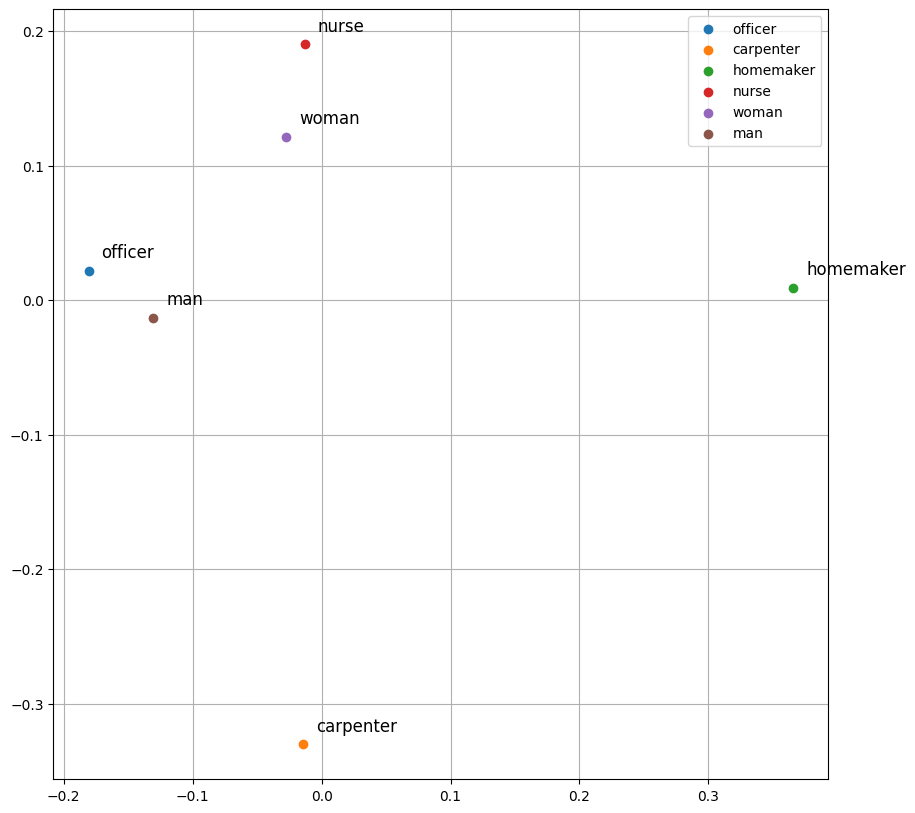


سوگیری‌های جنسیتی: در اینجا شاهد سوگیری‌های جنسیتی واضحی هستیم، جایی که مدل embedding کلمات زن و پرستار را به هم نزدیک کرده و مرد و افسر پلیس را نیز در کنار هم قرار داده است. این می‌تواند نشان‌دهنده‌ی این باشد که داده‌های آموزشی شامل سوگیری‌های اجتماعی موجود در دنیای واقعی است که بر مدل اثر                         می‌گذارد.                                                                                                                                                                             
در بسیاری از جوامع زنان بیشتر به نقش‌های مراقبتی مانند پرستاری و خانه‌داری مرتبط هستند در حالی که مردان بیشتر به شغل‌های نظامی یا مدیریتی و اجرایی مانند افسر پلیس یا افسر اجرایی نسبت داده می‌شوند. مدل‌های word embedding که از چنین داده‌هایی آموزش می‌بینند به‌طور طبیعی این الگوهای اجتماعی را                     یاد می‌گیرند.                                                                                                                                   .
نکته ای ک هست این هست ک باز با توجه به نمو

In [83]:
words = ["officer", "carpenter", "homemaker", "nurse", "woman", "man"]

# Get embeddings for each word
embeddings = np.array([get_text_embedding(word) for word in words])

reduced_embeddings = pca.fit_transform(embeddings)
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word)
    plt.text(reduced_embeddings[i, 0] + 0.01, reduced_embeddings[i, 1] + 0.01, word, fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("""
سوگیری‌های جنسیتی: در اینجا شاهد سوگیری‌های جنسیتی واضحی هستیم، جایی که مدل embedding کلمات زن و پرستار را به هم نزدیک کرده و مرد و افسر پلیس را نیز در کنار هم قرار داده است. این می‌تواند نشان‌دهنده‌ی این باشد که داده‌های آموزشی شامل سوگیری‌های اجتماعی موجود در دنیای واقعی است که بر مدل اثر                         می‌گذارد.                                                                                                                                                                             
در بسیاری از جوامع زنان بیشتر به نقش‌های مراقبتی مانند پرستاری و خانه‌داری مرتبط هستند در حالی که مردان بیشتر به شغل‌های نظامی یا مدیریتی و اجرایی مانند افسر پلیس یا افسر اجرایی نسبت داده می‌شوند. مدل‌های word embedding که از چنین داده‌هایی آموزش می‌بینند به‌طور طبیعی این الگوهای اجتماعی را                     یاد می‌گیرند.                                                                                                                                   .
نکته ای ک هست این هست ک باز با توجه به نمودار نهایی پرستار خانم مرد و افسر نزدیک به هم هستن یعنی نشان میدهد درمواردی دیده شده که خانم با کلمه افسر و یا مرد با کلمه پرستار امده باشد ولی با توجه به داده ها بیشتر مواقع خانه داری با خانم و نجار با مرد امده ک این ۲ شغل دور از بقیه امده و نجار از یک سو با مرد و خانه دار از یک سو به خانم وصل شده ک نشان میدهد نجاری مختص اقایان و خانه داری برای خانم ها هست.                                                                .
""")

# **نکات مهم**

<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%; font-size: 16px;">
    <p><strong>مهلت تحویل بدون جریمه:</strong> ۱۹ آبان ۱۴۰۳</p>
    <p><strong>مهلت تحویل با تاخیر (با جریمه):</strong> ۲۶ آبان ۱۴۰۳</p>
</div>

<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>فایل ارسالی شما باید با فرمت زیر نامگذاری شود:
        <code>NLP_CA2_LASTNAME_STUDENTID.ipynb</code>
    </h4>
</div>


<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>صداقت علمی:</h4>
    <ul style="font-family: Vazir; font-size: 16px;">
        <li>
            ما نوت‌بوک‌های تعداد مشخصی از دانشجویان که به صورت تصادفی انتخاب می‌شوند، بررسی خواهیم کرد.
            این بررسی‌ها اطمینان حاصل می‌کنند که کدی که نوشتید واقعاً پاسخ‌های موجود در نوت‌بوک شما را تولید می‌کند.
            اگر پاسخ‌های صحیح را در نوت‌بوک خود بدون کدی که واقعاً آن پاسخ‌ها را تولید کند تحویل دهید،
            این یک مورد جدی از عدم صداقت علمی محسوب می‌شود.
        </li>
        <li>
            ما همچنین بررسی‌های خودکاری را برای تشخیص سرقت علمی در نوت‌بوک‌های کولب انجام خواهیم داد.
            کپی کردن کد از دیگران نیز یک مورد جدی از عدم صداقت علمی محسوب می‌شود.
        </li>
    </ul>
</div>


<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>توضیحات تکمیلی:</h4>
    <ul style="font-family: Vazir; font-size: 16px;">
        <li>
            خوانایی و دقت بررسی‌ها در گزارش نهایی از اهمیت ویژه‌ای برخوردار است. به تمرین‌هایی که به صورت کاغذی تحویل داده شوند یا به صورت عکس در سایت بارگذاری شوند، ترتیب اثری داده نخواهد شد.
        </li>
        <li>
            همه‌ی کدهای پیوست گزارش بایستی قابلیت اجرای مجدد داشته باشند. در صورتی که برای اجرا مجدد آن‌ها نیاز به تنظیمات خاصی می‌باشد، بایستی تنظیمات مورد نیاز را نیز در گزارش خود ذکر کنید.
            دقت کنید که تمامی کدها باید توسط شما اجرا شده باشند و نتایج اجرا در فایل کدهای ارسالی مشخص باشد. به کدهایی که نتایج اجرای آن‌ها در فایل ارسالی مشخص نباشد نمره‌ای تعلق نمی‌گیرد.
        </li>
        <li>
            تمرین تا یک هفته بعد از مهلت تعیین شده با تاخیر تحویل گرفته می‌شود. دقت کنید که شما جمعاً برای تمام تکالیف، ۱۴ روز زمان تحویل بدون جریمه دارید که تنها از ۷ روز آن برای هر تمرین می‌توانید استفاده کنید. در صورتی که این ۱۴ روز به اتمام رسیده باشد، به ازای هر روز تاخیر ده درصد جریمه می‌شود.
        </li>
        <li>
            توجه کنید این تمرین باید به صورت تک‌نفره انجام شود و پاسخ‌های ارائه شده باید نتیجه فعالیت فرد نویسنده باشد (همفکری و به اتفاق هم نوشتن تمرین نیز ممنوع است). در صورت مشاهده
            تشابه به همه افراد مشارکت‌کننده، نمره تمرین صفر و به استاد گزارش می‌گردد.
        </li>
        <li>
            برای مطالعه بیشتر درباره‌ی فرمت مارک‌دون می‌توانید از
            <a href="https://github.com/tajaddini/Persian-Markdown/blob/master/learn-MD.md">این لینک</a>
            مطالعه کنید.
        </li>
    </ul>
</div>
